##Introduction
# Analyse en Composantes Principales (PCA) - Implémentation manuelle

Ce notebook présente une implémentation **manuelle** de l'analyse en composantes principales (PCA),
suivie d'une comparaison avec la bibliothèque `scikit-learn`. Le projet inclut :

- Le centrage des données
- Le calcul de la matrice de covariance
- L'extraction des vecteurs propres
- La projection des données dans le nouvel espace
- Une visualisation colorée selon les classes

**Objectif pédagogique :** comprendre en profondeur les étapes internes de la PCA.


In [ ]:
#Implémentation des libreries
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lin


In [ ]:
#Impléméntation de la fonction PC pour l'analyse en composantes principales
def PC(M):

  M=np.array(M)
  h, w =np.shape(M)

  #Calcul des matrices centrées
  moyennes=[]

  M_centered=[]
  for i in range(w):
    m=np.mean(M[:,i])
    v=M[:, i]-m
    M_centered.append(v)
    moyennes.append(m)

  M_centered=np.array(M_centered).T

  #Calcul de la matrice de covariance
  cov=np.dot(np.transpose(M_centered), M_centered)/(h-1)

  #Valeurs/Vecteurs propres
  val_pr, vec_pr=lin.eig(cov)

  #Trier les val propres
  indices=np.argsort(val_pr)[::-1]
  Val_p_tr=val_pr[indices]
  Vec_p_tr=vec_pr[:, indices]

  #Calcul des projections
  PC1=Vec_p_tr[: , 0]
  PC2=Vec_p_tr[: , 1]
  p1=np.dot(M_centered, PC1)
  p2=np.dot(M_centered , PC2 )

  return  PC1, PC2,p1, p2

In [ ]:
variables=[] #Liste pour stocker les variables (features)
labels=[]  #Liste pour stocker les étiquettes (classes)

#Ouverture du fichier contenat les données
with open ('../data/iris.txt', 'r') as data:

  for line in data:

    #Découpage par virgule
    line=line.strip().split(',')

    if len(line)<5:
      continue;  #Ignorer les lignes incomplètes

    #Conversion des 4 premières valeurs en float: les variables numériques
    variable=[float(var) for var in line[0:4]]

    #La cinqième variable est la classe de la fleur
    label=line[4]

    #Ajout des données dans les listes
    variables.append(variable)
    labels.append(label)


In [ ]:
#Exécution de la fonction PC
PC1, PC2, p1, p2=PC(variables)


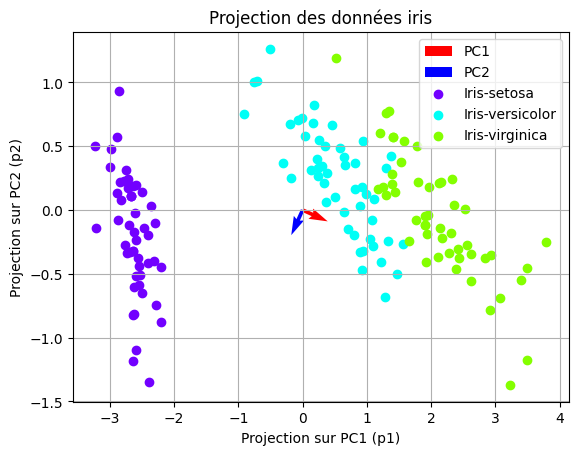

In [ ]:
#Importation de seaborn pour l'utilisation de la palette des couleurs
import seaborn as sb

#Récupération des différentes classes sans doublons
classes=list(set(labels))

#Création d'une palette de couleurs (une couleur pour chaque classe)
couleurs=sb.color_palette('hsv', len(classes))

#Dictionnaire associant chaque classe à une couleur
cmap=dict(zip(classes, couleurs))

# Calcul des coordonnées du point d'origine pour les vecteurs PC1 et PC2
origin1=np.mean(p1)
origin2=np.mean(p2)

plt.figure()

#Affichage de la prmière direction principale PC1
plt.quiver(origin1, origin2, PC1[0], PC1[1], angles='xy', color='red', label='PC1')

#Affichage de la deuxième direction principale PC2
plt.quiver(origin1, origin2, PC2[0], PC2[1], angles='xy', color='blue', label='PC2')

# Affichage des points projetés avec la couleur correspondant à sa classe
for i in range(len(variables)):
  plt.scatter(p1[i], p2[i], color=cmap[labels[i]], label=labels[i] if i==labels.index(labels[i]) else "")

plt.grid('True')
plt.xlabel('Projection sur PC1 (p1)')
plt.ylabel('Projection sur PC2 (p2)')
plt.title('Projection des données iris')
plt.legend()

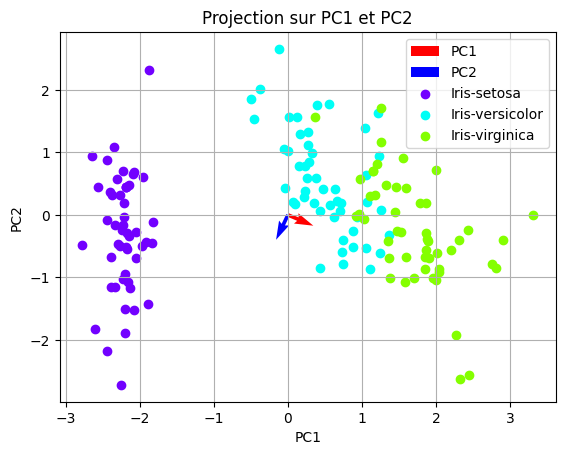

In [ ]:
#Analyse en composantes principales avec sklearn
#Importation des libreries nécéssaires
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Création d’un objet pour la normalisation (centrer-réduire)
scaler=StandardScaler()

# Application du centrage-réduction sur les données
X_fit=scaler.fit_transform(variables)

# Création d’un objet PCA pour réduire à 2 dimensions
pca=PCA(n_components=2)

# Application de la PCA : on obtient les nouvelles coordonnées des points
X_pca=pca.fit_transform(X_fit)

# 1er vecteur propre (PC1)
pc1=pca.components_[0]

# 2eme vecteur propre (PC2)
pc2=-pca.components_[1]

# Coordonnée x du centre de la projection (moyenne des données projetées)
or1=np.mean(X_pca[:,0])

# Coordonnée y du centre
or2=np.mean(X_pca[:, 1])

# Affichage de PC1
plt.quiver(or1, or2, pc1[0], pc1[1], angles='xy', scale_units='xy', label='PC1', color='red')

# Affichage de PC2
plt.quiver(or1, or2, pc2[0], pc2[1], angles='xy', scale_units='xy', label='PC2', color='blue')

# Affichage des poinst projetés avec la couleur correspondant à sa classe

for j in range(len(variables)):
  plt.scatter(X_pca[j , 0], -X_pca[j , 1], color=cmap[labels[j]], label=labels[j] if j==labels.index(labels[j]) else "")
plt.xlabel('Projection sur PC1 ')
plt.ylabel('Projection sur PC2')
plt.title('Projection sur PC1 et PC2')
plt.grid('True')
plt.legend()


## Conclusion

Nous avons implémenté la PCA étape par étape sans utiliser de bibliothèques haut niveau,
et confirmé les résultats en les comparant à ceux de `sklearn.decomposition.PCA`.

Ce type de projet est idéal pour renforcer sa compréhension du fonctionnement interne des algorithmes
de réduction de dimension, essentiels en Machine Learning.


